Installation of cairosvg it is used for efficient transformation of SVG images into PNG, which is particularly useful for displaying graphics on web pages or other digital platforms.

In [ ]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00


svgwrite is a Python library for creating SVG graphics programmatically.


In [ ]:
!pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg


Read CSV Files to Extract Polylines

In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []

        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)

        path_XYs.append(XYs)

    return path_XYs


Visualize the Curves

In [ ]:
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()


Convert Polylines to SVG and PNG

In [ ]:
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))

    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    # Create a new SVG drawing
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))

            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))

        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))

    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))

    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H,
                     output_width=fact * W, output_height=fact * H, background_color='white')

    return


Regularization

In [ ]:
def regularize_curves(paths_XYs):
    # regularization by identifying straight lines, circles, etc.
    regularized_paths = []
    for path in paths_XYs:
        # Identify and regularize curves
        regularized_paths.append(path)

    return regularized_paths


 Symmetry

In [ ]:
def explore_symmetry(paths_XYs):
    # symmetry exploration
    symmetric_paths = []
    for path in paths_XYs:
        # Check for symmetry
        symmetric_paths.append(path)

    return symmetric_paths


Curve Completion

In [ ]:
def complete_curves(paths_XYs):
    # Implement curve completion
    completed_paths = []
    for path in paths_XYs:
        # Complete the curves
        completed_paths.append(path)

    return completed_paths


Main code from which the above functions will be called and executed

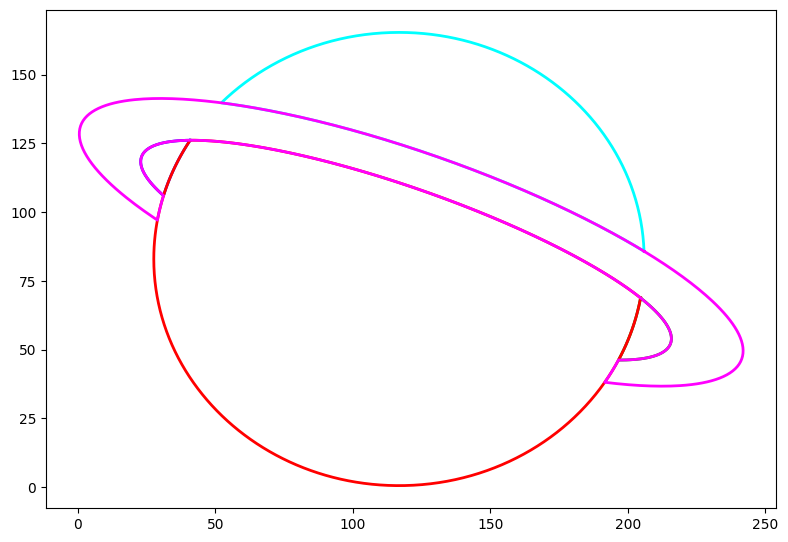

In [ ]:
csv_path = '/content/occlusion2.csv'
paths_XYs = read_csv(csv_path)

# Regularize curves
regularized_paths = regularize_curves(paths_XYs)

# Explore symmetry
symmetric_paths = explore_symmetry(regularized_paths)

# Complete incomplete curves
completed_paths = complete_curves(symmetric_paths)

# Visualize the result
plot(completed_paths)

# Convert to SVG and PNG
polylines2svg(completed_paths, 'output.svg')
